## KMeans on a Randomly Generated Dataset

Import Libraries

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs


#### Create Random Dataset
+ Numpy's random.seed()

In [2]:
np.random.seed(0)

Make random clusters of Points by using make_blobs


+ Input:
    + n_samples: The total number of points equally divided among clusters. values = 5000
    + centers: The number of centers to generate, or the fixed center locations.Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]]
    + cluster_std: The standard deviation of the clusters.Value will be: 0.9


+ Output:
    + X: Array of shape [n_samples, n_features]. (Feature Matrix)The generated samples.
    + y: Array of shape [n_samples]. (Response Vector)The integer labels for cluster membership of each sample.

In [3]:
X,y = make_blobs(n_samples = 5000, centers = [[4,4],[-2,-1],[2,-3],[1,1]], cluster_std = 0.9)

In [4]:
X

array([[-1.82150565,  0.07098024],
       [ 2.16732621, -2.93199608],
       [ 0.8465158 , -3.26075305],
       ...,
       [ 3.29772603,  4.24400152],
       [-1.69503125, -0.29979681],
       [-1.64362141,  0.63035513]])

In [5]:
y

array([1, 2, 2, ..., 0, 1, 1])

Plot the randomly generated Data

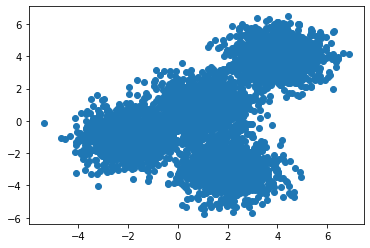

In [6]:
plt.scatter(X[:,0], X[:,1], marker = "o")

#### Setup KMeans

+ init: Initialization method of the centroids.
    + Value will be: "k-means++"
    + k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
+ n_clusters: The number of clusters to form as well as the number of centroids to generate.
    + Value will be: 4 (since we have 4 centers)
+ n_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n\_init consecutive runs in terms of inertia.
    + Value will be: 12

In [7]:
kmeans = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [8]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Fit the Model

In [9]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Get kmeans labels

In [10]:
kmeanslabels = kmeans.labels_
kmeanslabels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

#### Get the Coordinates of Cluster Centers

In [11]:
kmeansclustercenters = kmeans.cluster_centers_
kmeansclustercenters

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

#### Visualize the Clusters

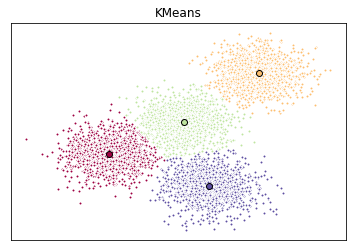

In [12]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(kmeanslabels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    mymembers = (kmeanslabels == k)
    
    # Define the centroid, or cluster center.
    clustercenter = kmeansclustercenters[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[mymembers, 0], X[mymembers, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(clustercenter[0], clustercenter[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()
